<a href="https://colab.research.google.com/github/gohenry/DataScienceCoursera/blob/master/ArtAuction_Nov3_11pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
cd drive/My Drive

/content/drive/My Drive


In [3]:
#import the necessary packages
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
#load numerical data using Pandas
!pip install -q xlrd

cols = ['num_author','creation_year','height','width','estimate_low','estimate_high','auction_year','artist_birth','hammer price']
df = pd.read_excel('result_2017_2018.xlsx', usecols=cols)
df


,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,hammer price
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,161338.0
1,1,1982.0,14.0,11.0,92678.0,139017.0,2018.0,1928.0,NaN
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,128750.0
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,105102.0
4,1,1982.0,8.0,16.0,131378.0,197067.0,2018.0,1928.0,NaN
...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,2183869.0
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,1900000.0
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,4343000.0
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,3300000.0


In [0]:
#drop rows containing missing data
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca487d3c88>]],
      dtype=object)

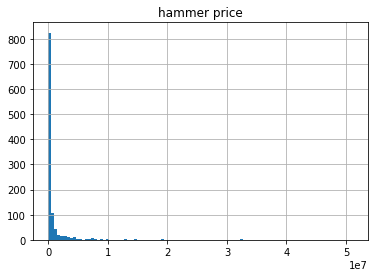

In [6]:
#check distribution of hammer price
df.hist(column='hammer price', bins=100)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca4820f898>]],
      dtype=object)

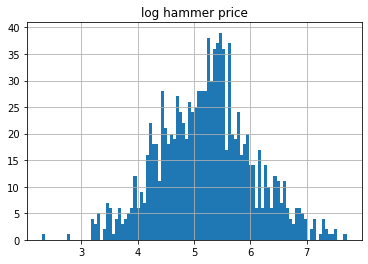

In [7]:
#create log hammer price
df['log hammer price'] = np.log10(df['hammer price'])
df.hist(column='log hammer price', bins=100)

In [8]:
#drop 'hammer price' column
df.drop(columns='hammer price')

,num_author,creation_year,height,width,estimate_low,estimate_high,auction_year,artist_birth,log hammer price
0,1,1983.0,14.0,10.0,80669.0,141170.0,2018.0,1928.0,5.207737
2,1,1984.0,20.0,16.0,91964.0,118239.0,2018.0,1928.0,5.109747
3,1,1982.0,8.0,16.0,131377.0,197066.0,2018.0,1928.0,5.021611
5,1,1982.0,6.0,20.0,91964.0,131378.0,2018.0,1928.0,4.858886
6,1,1986.0,22.0,22.0,131377.0,197066.0,2018.0,1928.0,5.232465
...,...,...,...,...,...,...,...,...,...
1453,100,1999.0,8.0,66.0,2117691.0,2911825.0,2018.0,1923.0,6.339227
1454,100,2012.0,6.0,120.0,1800000.0,2500000.0,2018.0,1923.0,6.278754
1455,100,1986.0,2.0,94.0,3500000.0,4500000.0,2018.0,1923.0,6.637790
1456,100,1989.0,76.0,114.0,3000000.0,5000000.0,2017.0,1923.0,6.518514


In [9]:
#bin log hammer price
bins = [0,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8]
labels = [0,1,2,3,4,5,6,7,8,9,10]
df['binned'] = pd.cut(df['log hammer price'], bins=bins, labels=labels)
print(df)

      num_author  creation_year  height  ...  hammer price  log hammer price  binned
0              1         1983.0    14.0  ...      161338.0          5.207737       5
2              1         1984.0    20.0  ...      128750.0          5.109747       5
3              1         1982.0     8.0  ...      105102.0          5.021611       5
5              1         1982.0     6.0  ...       72258.0          4.858886       4
6              1         1986.0    22.0  ...      170791.0          5.232465       5
...          ...            ...     ...  ...           ...               ...     ...
1453         100         1999.0     8.0  ...     2183869.0          6.339227       7
1454         100         2012.0     6.0  ...     1900000.0          6.278754       7
1455         100         1986.0     2.0  ...     4343000.0          6.637790       8
1456         100         1989.0    76.0  ...     3300000.0          6.518514       8
1457         100         1978.0     2.0  ...     1500000.0       

In [0]:
#create X and Y
dataset = df.values
X = dataset[:, :8]
Y = dataset[:,10]

In [11]:
X

array([[1, 1983.0, 14.0, ..., 141170.0, 2018.0, 1928.0],
       [1, 1984.0, 20.0, ..., 118239.0, 2018.0, 1928.0],
       [1, 1982.0, 8.0, ..., 197066.0, 2018.0, 1928.0],
       ...,
       [100, 1986.0, 2.0, ..., 4500000.0, 2018.0, 1923.0],
       [100, 1989.0, 76.0, ..., 5000000.0, 2017.0, 1923.0],
       [100, 1978.0, 2.0, ..., 2500000.0, 2017.0, 1923.0]], dtype=object)

In [12]:
Y

array([5, 5, 5, ..., 8, 8, 7], dtype=object)

In [13]:
# one-hot encode the log hammer price
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y) 
print(dummy_y)
print(dummy_y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1101, 11)


In [14]:
# split training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.25)
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)
print(X_test[0])

(825, 8) (825, 11) (276, 8) (276, 11)
[98 1976.0 8.0 24.0 25905.0 37681.0 2018.0 1923.0]


In [0]:
#standardize X_train and X_test using mean and standard deviation of training samples
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[-1.26617538, -2.03619125, -0.34952868, ...,  0.62327688,
         0.95843865, -2.30417618],
       [-1.26617538, -2.94018473, -0.55761899, ..., -0.04961615,
         0.95843865, -2.30417618],
       [ 1.64673009,  0.91368221, -0.55761899, ..., -0.31675503,
        -1.0433636 ,  1.06848412],
       ...,
       [-0.1612802 ,  0.34273896, -0.34952868, ..., -0.28515264,
        -1.0433636 , -0.02406781],
       [-1.26617538, -1.94103404, -0.34952868, ..., -0.09033354,
        -1.0433636 , -2.30417618],
       [-0.1612802 , -0.13304708, -0.34952868, ...,  0.0939946 ,
         0.95843865, -0.02406781]])

In [17]:
#Create model
#model_16_16 = Sequential()
#model_16_32 = Sequential()
#model_16_64 = Sequential()
#model_16_128 = Sequential()

#model_32_16 = Sequential()
model_32_32_abc = Sequential()
model_32_32_bc = Sequential()
model_32_32 = Sequential()

#model_32_64 = Sequential()
#model_32_128 = Sequential()

#model_64_16 = Sequential()
#model_64_32 = Sequential()
#model_64_64 = Sequential()
#model_64_128 = Sequential()

#model_128_16 = Sequential()
#model_128_32 = Sequential()
#model_128_64 = Sequential()
#model_128_128 = Sequential()

#Add more layers
#model_16_16.add(Dropout(0.2))
#model_16_16.add(Dense(16, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_16_16.add(Dropout(0.2))
#model_16_16.add(Dense(16, activation='relu', kernel_initializer='normal'))
#model_16_16.add(Dropout(0.2))
#model_16_16.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_16_32.add(Dropout(0.2))
#model_16_32.add(Dense(16, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_16_32.add(Dropout(0.2))
#model_16_32.add(Dense(32, activation='relu', kernel_initializer='normal'))
#model_16_32.add(Dropout(0.2))
#model_16_32.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_16_64.add(Dropout(0.2))
#model_16_64.add(Dense(16, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_16_64.add(Dropout(0.2))
#model_16_64.add(Dense(64, activation='relu', kernel_initializer='normal'))
#model_16_64.add(Dropout(0.2))
#model_16_64.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_16_128.add(Dropout(0.2))
#model_16_128.add(Dense(16, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_16_128.add(Dropout(0.2))
#model_16_128.add(Dense(128, activation='relu', kernel_initializer='normal'))
#model_16_128.add(Dropout(0.2))
#model_16_128.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_32_16.add(Dropout(0.2))
#model_32_16.add(Dense(32, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_32_16.add(Dropout(0.2))
#model_32_16.add(Dense(16, activation='relu', kernel_initializer='normal'))
#model_32_16.add(Dropout(0.2))
#model_32_16.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
model_32_32_abc.add(Dropout(0.2))
model_32_32_abc.add(Dense(32, activation='relu', input_shape = (8,), kernel_initializer='normal'))
model_32_32_abc.add(Dropout(0.2))
model_32_32_abc.add(Dense(32, activation='relu', kernel_initializer='normal'))
model_32_32_abc.add(Dropout(0.2))
model_32_32_abc.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
model_32_32_bc.add(Dense(32, activation='relu', input_shape = (8,), kernel_initializer='normal'))
model_32_32_bc.add(Dropout(0.2))
model_32_32_bc.add(Dense(32, activation='relu', kernel_initializer='normal'))
model_32_32_bc.add(Dropout(0.2))
model_32_32_bc.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
model_32_32.add(Dense(32, activation='relu', input_shape = (8,), kernel_initializer='normal'))
model_32_32.add(Dense(32, activation='relu', kernel_initializer='normal'))
model_32_32.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_32_64.add(Dropout(0.2))
#model_32_64.add(Dense(32, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_32_64.add(Dropout(0.2))
#model_32_64.add(Dense(64, activation='relu', kernel_initializer='normal'))
#model_32_64.add(Dropout(0.2))
#model_32_64.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_32_128.add(Dropout(0.2))
#model_32_128.add(Dense(32, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_32_128.add(Dropout(0.2))
#model_32_128.add(Dense(128, activation='relu', kernel_initializer='normal'))
#model_32_128.add(Dropout(0.2))
#model_32_128.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_64_16.add(Dropout(0.2))
#model_64_16.add(Dense(64, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_64_16.add(Dropout(0.2))
#model_64_16.add(Dense(16, activation='relu', kernel_initializer='normal'))
#model_64_16.add(Dropout(0.2))
#model_64_16.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_64_32.add(Dropout(0.2))
#model_64_32.add(Dense(64, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_64_32.add(Dropout(0.2))
#model_64_32.add(Dense(32, activation='relu', kernel_initializer='normal'))
#model_64_32.add(Dropout(0.2))
#model_64_32.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_64_64.add(Dropout(0.2))
#model_64_64.add(Dense(64, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_64_64.add(Dropout(0.2))
#model_64_64.add(Dense(64, activation='relu', kernel_initializer='normal'))
#model_64_64.add(Dropout(0.2))
#model_64_64.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_64_128.add(Dropout(0.2))
#model_64_128.add(Dense(64, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_64_128.add(Dropout(0.2))
#model_64_128.add(Dense(128, activation='relu', kernel_initializer='normal'))
#model_64_128.add(Dropout(0.2))
#model_64_128.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_128_16.add(Dropout(0.2))
#model_128_16.add(Dense(128, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_128_16.add(Dropout(0.2))
#model_128_16.add(Dense(16, activation='relu', kernel_initializer='normal'))
#model_128_16.add(Dropout(0.2))
#model_128_16.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_128_32.add(Dropout(0.2))
#model_128_32.add(Dense(128, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_128_32.add(Dropout(0.2))
#model_128_32.add(Dense(32, activation='relu', kernel_initializer='normal'))
#model_128_32.add(Dropout(0.2))
#model_128_32.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_128_64.add(Dropout(0.2))
#model_128_64.add(Dense(128, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_128_64.add(Dropout(0.2))
#model_128_64.add(Dense(64, activation='relu', kernel_initializer='normal'))
#model_128_64.add(Dropout(0.2))
#model_128_64.add(Dense(11, activation='softmax', kernel_initializer='normal'))

#Add more layers
#model_128_128.add(Dropout(0.2))
#model_128_128.add(Dense(128, activation='relu', input_shape = (8,), kernel_initializer='normal'))
#model_128_128.add(Dropout(0.2))
#model_128_128.add(Dense(128, activation='relu', kernel_initializer='normal'))
#model_128_128.add(Dropout(0.2))
#model_128_128.add(Dense(11, activation='softmax', kernel_initializer='normal'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
## complie the model using adam optimizer and categorical crossentropy 
#model_16_16.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_16_32.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_16_64.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_16_128.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#model_32_16.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model_32_32_abc.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model_32_32_bc.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model_32_32.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_32_64.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_32_128.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#model_64_16.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_64_32.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_64_64.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_64_128.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#model_128_16.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_128_32.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_128_64.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#model_128_128.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
# train the model
#hist_16_16 = model_16_16.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_16_32 = model_16_32.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_16_64 = model_16_64.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_16_128 = model_16_128.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)

#hist_32_16 = model_32_16.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
hist_32_32_abc = model_32_32_abc.fit(X_train_scaled, Y_train, batch_size=64, epochs=200,validation_split=0.1)
hist_32_32_bc = model_32_32_bc.fit(X_train_scaled, Y_train, batch_size=64, epochs=200,validation_split=0.1)
hist_32_32 = model_32_32.fit(X_train_scaled, Y_train, batch_size=64, epochs=200,validation_split=0.1)
#hist_32_64 = model_32_64.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_32_128 = model_32_128.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)

#hist_64_16 = model_64_16.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_64_32 = model_64_32.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_64_64 = model_64_64.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_64_128 = model_64_128.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)

#hist_128_16 = model_128_16.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_128_32 = model_128_32.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_128_64 = model_128_64.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)
#hist_128_128 = model_128_128.fit(X_train_scaled, Y_train, batch_size=64, epochs=400,validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 742 samples, validate on 83 samples
Epoch 1/200





742/742 [==============================] - 0s 501us/step - loss: 2.3911 - acc: 0.2520 - val_loss: 2.3823 - val_acc: 0.2410
Epoch 2/200
742/742 [==============================] - 0s 28us/step - loss: 2.3707 - acc: 0.2709 - val_loss: 2.3577 - val_acc: 0.2410
Epoch 3/200
742/742 [==============================] - 0s 31us/step - loss: 2.3309 - acc: 0.2695 - val_loss: 2.3103 - val_acc: 0.2410
Epoch 4/200
742/742 [==============================] - 0s 27us/step - loss: 2.2564 - acc: 0.2722 - val_loss: 2.2227 - val_acc: 0.2410
Epoch 5/200
742/742 [==============================] - 0s 28us/step - loss: 2.1369 - acc: 0.2736 - val_loss: 2.1019 - val_acc: 0.2410
Epoch 6/200
742/742 [==============================] - 0s 26us/step - loss: 2.0056 - acc: 0.2722 - val_loss: 2.0011 - val_acc: 0.2410
Epoch 7/200
742/742 [===========================

In [20]:
#Printing out last value of the Training. More complicated network *should* be better... 

#print(hist_16_16.history['loss'][199])
#print(hist_32_16.history['loss'][199])
#print(hist_64_16.history['loss'][199])
#print(hist_128_16.history['loss'][199])

#print(hist_16_32.history['loss'][199])
print(hist_32_32_abc.history['loss'][199])
print(hist_32_32_bc.history['loss'][199])
#print(hist_64_32.history['loss'][199])
#print(hist_128_32.history['loss'][199])

#print(hist_16_64.history['loss'][199])
#print(hist_32_64.history['loss'][199])
#print(hist_64_64.history['loss'][199])
#print(hist_128_64.history['loss'][199])

#print(hist_16_128.history['loss'][199])
#print(hist_32_128.history['loss'][199])
#print(hist_64_128.history['loss'][199])
#print(hist_128_128.history['loss'][199])


1.3147780230103157
0.9349211557213508


In [21]:
#Printing out last value of the validation. More complicated network *should* be better... 

#print(hist_16_16.history['val_loss'][199])
#print(hist_32_16.history['val_loss'][199])
#print(hist_64_16.history['val_loss'][199])
#print(hist_128_16.history['val_loss'][199])

#print(hist_16_32.history['val_loss'][199])
print(hist_32_32_abc.history['val_loss'][199])
print(hist_32_32_bc.history['val_loss'][199])
#print(hist_64_32.history['val_loss'][199])
#print(hist_128_32.history['val_loss'][199])

#print(hist_16_64.history['val_loss'][199])
#print(hist_32_64.history['val_loss'][199])
#print(hist_64_64.history['val_loss'][199])
#print(hist_128_64.history['val_loss'][199])

#print(hist_16_128.history['val_loss'][199])
#print(hist_32_128.history['val_loss'][199])
#print(hist_64_128.history['val_loss'][199])
#print(hist_128_128.history['val_loss'][199])


1.2591138690351003
0.9987526141017317


In [22]:
#Printing out last value of the Accuracy. More complicated network *should* be better... 

#print(hist_16_16.history['acc'][199])
#print(hist_32_16.history['acc'][199])
#print(hist_64_16.history['acc'][199])
#print(hist_128_16.history['acc'][199])

#print(hist_16_32.history['acc'][199])
print(hist_32_32_abc.history['acc'][199])
print(hist_32_32_bc.history['acc'][199])
#print(hist_64_32.history['acc'][199])
#print(hist_128_32.history['acc'][199])

#print(hist_16_64.history['acc'][199])
#print(hist_32_64.history['acc'][199])
#print(hist_64_64.history['acc'][199])
#print(hist_128_64.history['acc'][199])

#print(hist_16_128.history['acc'][199])
#print(hist_32_128.history['acc'][199])
#print(hist_64_128.history['acc'][199])
#print(hist_128_128.history['acc'][199])

0.45417789837742106
0.6024258747255063


In [23]:
#Printing out last value of the Accuracy. More complicated network *should* be better... 

#print(hist_16_16.history['val_acc'][199])
#print(hist_32_16.history['val_acc'][199])
#print(hist_64_16.history['val_acc'][199])
#print(hist_128_16.history['val_acc'][199])

#print(hist_16_32.history['val_acc'][199])
print(hist_32_32_abc.history['val_acc'][199])
print(hist_32_32_bc.history['val_acc'][199])
#print(hist_64_32.history['val_acc'][199])
#print(hist_128_32.history['val_acc'][199])

#print(hist_16_64.history['val_acc'][199])
#print(hist_32_64.history['val_acc'][199])
#print(hist_64_64.history['val_acc'][199])
#print(hist_128_64.history['val_acc'][199])

#print(hist_16_128.history['val_acc'][199])
#print(hist_32_128.history['val_acc'][199])
#print(hist_64_128.history['val_acc'][199])
#print(hist_128_128.history['val_acc'][199])

0.4337349404771644
0.6506024038935282


In [24]:

# Storing the evaluation performance 

#[Loss_16_16, Acc_16_16] = model_16_16.evaluate(X_test_scaled, Y_test)
#[Loss_16_32, Acc_16_32] = model_16_32.evaluate(X_test_scaled, Y_test)
#[Loss_16_64, Acc_16_64] = model_16_64.evaluate(X_test_scaled, Y_test)
#[Loss_16_128, Acc_16_128] = model_16_128.evaluate(X_test_scaled, Y_test)

#[Loss_32_16, Acc_32_16] = model_32_16.evaluate(X_test_scaled, Y_test)
[Loss_32_32_abc, Acc_32_32_abc] = model_32_32_abc.evaluate(X_test_scaled, Y_test)
[Loss_32_32_bc, Acc_32_32_bc] = model_32_32_bc.evaluate(X_test_scaled, Y_test)
[Loss_32_32, Acc_32_32] = model_32_32.evaluate(X_test_scaled, Y_test)
#[Loss_32_64, Acc_32_64] = model_32_64.evaluate(X_test_scaled, Y_test)
#[Loss_32_128, Acc_32_128] = model_32_128.evaluate(X_test_scaled, Y_test)

#[Loss_64_16, Acc_64_16] = model_64_16.evaluate(X_test_scaled, Y_test)
#[Loss_64_32, Acc_64_32] = model_64_32.evaluate(X_test_scaled, Y_test)
#[Loss_64_64, Acc_64_64] = model_64_64.evaluate(X_test_scaled, Y_test)
#[Loss_64_128, Acc_64_128] = model_64_128.evaluate(X_test_scaled, Y_test)

#[Loss_128_16, Acc_128_16] = model_128_16.evaluate(X_test_scaled, Y_test)
#[Loss_128_32, Acc_128_32] = model_128_32.evaluate(X_test_scaled, Y_test)
#[Loss_128_64, Acc_128_64] = model_128_64.evaluate(X_test_scaled, Y_test)
#[Loss_128_128, Acc_128_128] = model_128_128.evaluate(X_test_scaled, Y_test)

276/276 [==============================] - 0s 35us/step


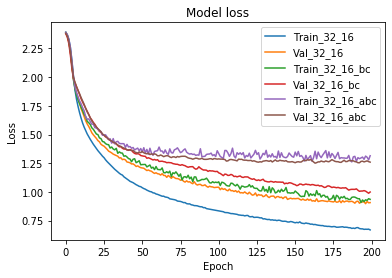

In [25]:
#Plotting for visual effect

#plt.plot(hist_16_16.history['loss'])
#plt.plot(hist_16_32.history['val_loss'])
#plt.plot(hist_32_16.history['loss'])
#plt.plot(hist_32_32.history['val_loss'])
#plt.plot(hist_64_16.history['loss'])
#plt.plot(hist_64_32.history['val_loss'])
#plt.plot(hist_128_16.history['loss'])
#plt.plot(hist_128_32.history['val_loss'])

# plot the loss
#plt.plot(hist_16_32.history['loss'])
#plt.plot(hist_16_32.history['val_loss'])
plt.plot(hist_32_32.history['loss'])
plt.plot(hist_32_32.history['val_loss'])
plt.plot(hist_32_32_bc.history['loss'])
plt.plot(hist_32_32_bc.history['val_loss'])
plt.plot(hist_32_32_abc.history['loss'])
plt.plot(hist_32_32_abc.history['val_loss'])

#plt.plot(hist_64_32.history['loss'])
#plt.plot(hist_64_32.history['val_loss'])
#plt.plot(hist_128_32.history['loss'])
#plt.plot(hist_128_32.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_32_16', 'Val_32_16','Train_32_16_bc', 'Val_32_16_bc','Train_32_16_abc', 'Val_32_16_abc'], loc = 'upper right')
#plt.legend(['Train_16_32', 'Val_16_32', 'Train_32_32', 'Val_32_32', 'Train_64_32', 'Val_64_32', 'Train_128_32', 'Val_128_32'], loc = 'upper right')
#plt.legend(['Train_16_16', 'Train_32_16', 'Train_64_16', 'Train_128_16', 'Train_16_32', 'Train_32_32', 'Train_64_32', 'Train_128_32'], loc = 'upper right')
plt.show()

In [0]:

#plt.plot(hist_16_64.history['loss'])
#plt.plot(hist_16_32.history['val_loss'])
#plt.plot(hist_32_64.history['loss'])
#plt.plot(hist_32_32.history['val_loss'])
#plt.plot(hist_64_64.history['loss'])
#plt.plot(hist_64_32.history['val_loss'])
#plt.plot(hist_128_64.history['loss'])
#plt.plot(hist_128_32.history['val_loss'])

# plot the loss
#plt.plot(hist_16_128.history['loss'])
#plt.plot(hist_16_32.history['val_loss'])
#plt.plot(hist_32_128.history['loss'])
#plt.plot(hist_32_32.history['val_loss'])
#plt.plot(hist_64_128.history['loss'])
#plt.plot(hist_64_32.history['val_loss'])
#plt.plot(hist_128_128.history['loss'])
#plt.plot(hist_128_32.history['val_loss'])

#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Val', 'Train2', 'Val2', 'Train3', 'Val3', 'Train4', 'Val4'], loc = 'upper right')
#plt.legend(['Train_16_64', 'Train_32_64', 'Train_64_64', 'Train_128_64', 'Train_16_128', 'Train_32_128', 'Train_64_128', 'Train_128_128'], loc = 'upper right')
#plt.show()

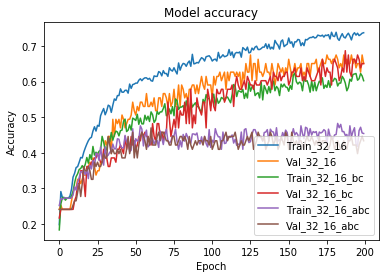

In [27]:
#plot the accuracy

#plt.plot(hist_16_32.history['acc'])
#plt.plot(hist_16_16.history['val_acc'])
#plt.plot(hist_32_32.history['acc'])
#plt.plot(hist_32_16.history['val_acc'])
#plt.plot(hist_64_32.history['acc'])
#plt.plot(hist_64_16.history['val_acc'])
#plt.plot(hist_128_32.history['acc'])
#plt.plot(hist_128_16.history['val_acc'])

#plt.plot(hist_16_32.history['acc'])
#plt.plot(hist_16_32.history['val_acc'])
plt.plot(hist_32_32.history['acc'])
plt.plot(hist_32_32.history['val_acc'])
plt.plot(hist_32_32_bc.history['acc'])
plt.plot(hist_32_32_bc.history['val_acc'])
plt.plot(hist_32_32_abc.history['acc'])
plt.plot(hist_32_32_abc.history['val_acc'])

#plt.plot(hist_64_32.history['acc'])
#plt.plot(hist_64_32.history['val_acc'])
#plt.plot(hist_128_32.history['acc'])
#plt.plot(hist_128_32.history['val_acc'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['Val', 'Val2', 'Val3', 'Val4'], loc = 'lower right')
plt.legend(['Train_32_16', 'Val_32_16','Train_32_16_bc', 'Val_32_16_bc','Train_32_16_abc', 'Val_32_16_abc'], loc = 'lower right')
#plt.legend(['Train_16_32', 'Val_16_32', 'Train_32_32', 'Val_32_32', 'Train_64_32', 'Val_64_32', 'Train_128_32', 'Val_128_32'], loc = 'lower right')
plt.show()

In [0]:
  #plot the accuracy

#plt.plot(hist_16_32.history['acc'])
#plt.plot(hist_16_64.history['val_acc'])
#plt.plot(hist_32_32.history['acc'])
#plt.plot(hist_32_64.history['val_acc'])
#plt.plot(hist_64_32.history['acc'])
#plt.plot(hist_64_64.history['val_acc'])
#plt.plot(hist_128_32.history['acc'])
#plt.plot(hist_128_64.history['val_acc'])

#plt.plot(hist_16_128.history['val_acc'])
#plt.plot(hist_32_32.history['acc'])
#plt.plot(hist_32_128.history['val_acc'])
#plt.plot(hist_64_32.history['acc'])
#plt.plot(hist_64_128.history['val_acc'])
#plt.plot(hist_128_32.history['acc'])
#plt.plot(hist_128_128.history['val_acc'])


#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Val_16_64', 'Val_32_64', 'Val_64_64', 'Val_128_64', 'Val_16_128', 'Val_32_128', 'Val_64_128', 'Val_128_128'], loc = 'lower right')
#plt.legend(['Train', 'Val', 'Train2', 'Val2', 'Train3', 'Val3', 'Train4', 'Val4'], loc = 'lower right')
#plt.show()

In [29]:
#print(Acc_16_16)
#print(Acc_16_32)
#print(Acc_16_64)
#print(Acc_16_128)

#print(Acc_32_16)
print(Acc_32_32)
print(Acc_32_32_bc)
print(Acc_32_32_abc)
#print(Acc_32_64)
#print(Acc_32_128)

#print(Acc_64_16)
#print(Acc_64_32)
#print(Acc_64_64)
#print(Acc_64_128)

#print(Acc_128_16)
#print(Acc_128_32)
#print(Acc_128_64)
#print(Acc_128_128)


0.6195652156636335
0.6376811602841252
0.4673913043478261


In [30]:
#print(Loss_16_16)
#print(Loss_16_32)
#print(Loss_16_64)
#print(Loss_16_128)

#print(Loss_32_16)
print(Loss_32_32)
print(Loss_32_32_bc)
print(Loss_32_32_abc)
#print(Loss_32_64)
#print(Loss_32_128)

#print(Loss_64_16)
#print(Loss_64_32)
#print(Loss_64_64)
#print(Loss_64_128)

#print(Loss_128_16)
#print(Loss_128_32)
#print(Loss_128_64)
#print(Loss_128_128)


0.8966674960177877
0.9555091356885606
1.228168074635492
